In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

C:\Users\mubas\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Read the csv

In [2]:
df = pd.read_csv("features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.shape

(9990, 60)

In [4]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

dropping the first column as it is unnecessary 

In [5]:
df = df.drop(labels='filename',axis=1)

In [9]:
audio_recordings = "C:/Users/mubas/Downloads/Data/genres_original/country/country.00095.wav"
data , sr = librosa.load(audio_recordings)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [10]:
data , sr = librosa.load(audio_recordings)

In [11]:
librosa.load(audio_recordings, sr=45600)

(array([-0.0196592 , -0.03069949, -0.03640301, ..., -0.12147263,
        -0.11400978, -0.06222323], dtype=float32),
 45600)

In [14]:
import IPython 

In [16]:
from IPython.display import Audio

# Assuming 'data' and 'sr' are already defined
audio_display = Audio(data, rate=sr)
audio_display

Visualising audio files

# 1. plot raw wave files

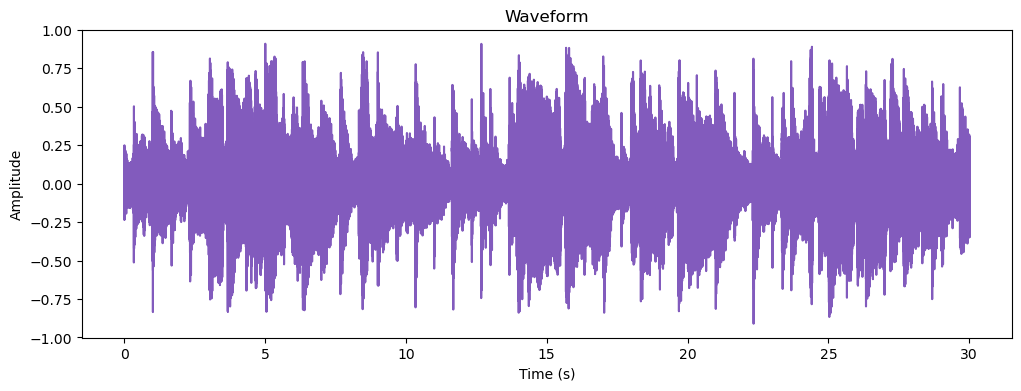

In [19]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' and 'sr' are already defined
plt.figure(figsize=(12, 4))
time = np.arange(0, len(data)) / sr
plt.plot(time, data, color="#825bbd")
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# 2. spectograms

C:\Users\mubas\AppData\Local\Temp\ipykernel_6432\328754603.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')


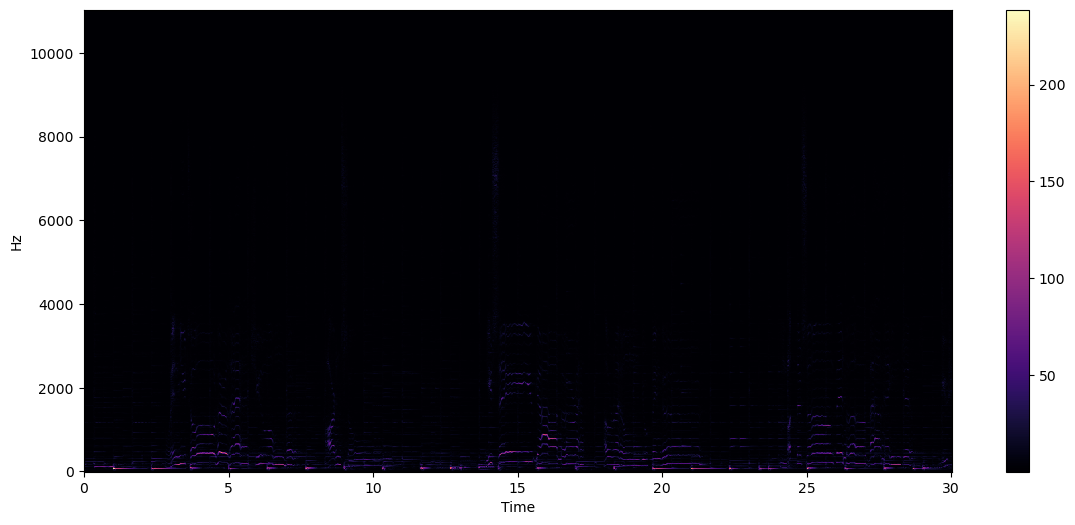

In [21]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

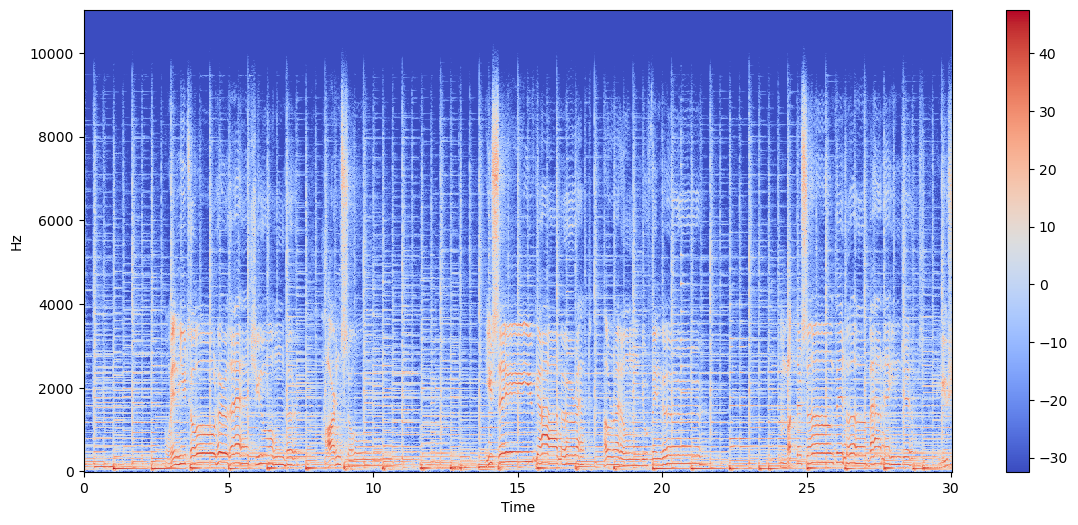

In [22]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# 3. spectral rolloff

In [23]:
from sklearn.preprocessing import normalize

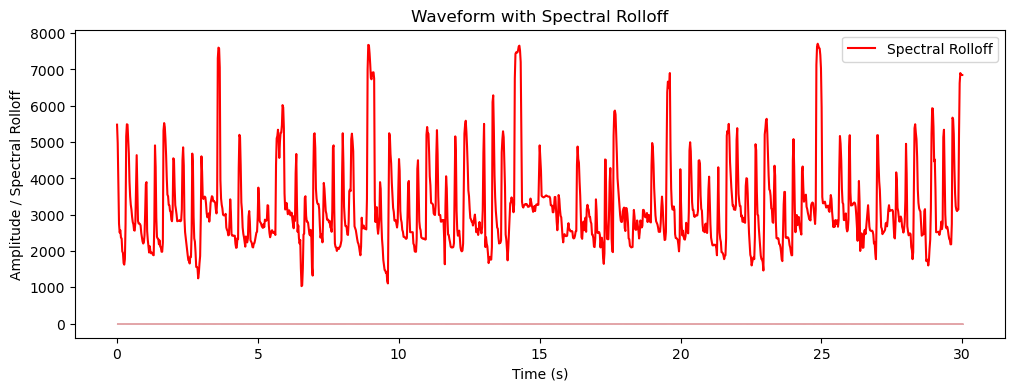

In [26]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Assuming 'data' and 'sr' are already defined
spectral_rolloff = librosa.feature.spectral_rolloff(y=data+0.01, sr=sr)[0]

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr, alpha=0.4, color="#ba232b")

# Plot the spectral rolloff
plt.plot(librosa.times_like(spectral_rolloff), spectral_rolloff, label='Spectral Rolloff', color='r')

plt.title('Waveform with Spectral Rolloff')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Spectral Rolloff')
plt.legend()
plt.show()

# 4. chroma feature

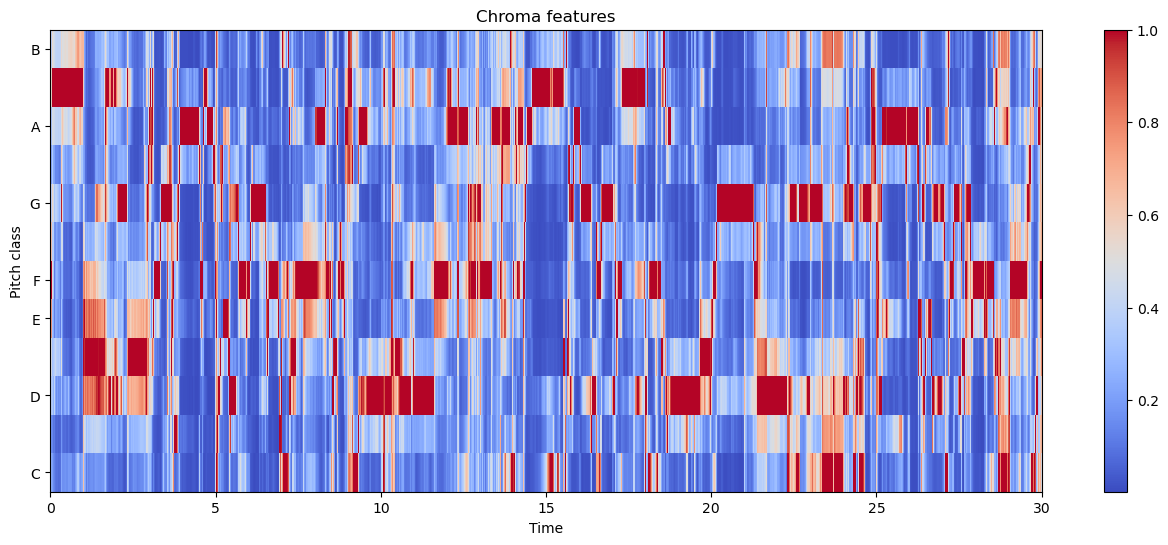

In [28]:
import librosa.display as lplt
import matplotlib.pyplot as plt

# Assuming 'data' and 'sr' are already defined
chroma = librosa.feature.chroma_stft(y=data, sr=sr)

plt.figure(figsize=(16, 6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma features")
plt.show()

5. zero crossing rate

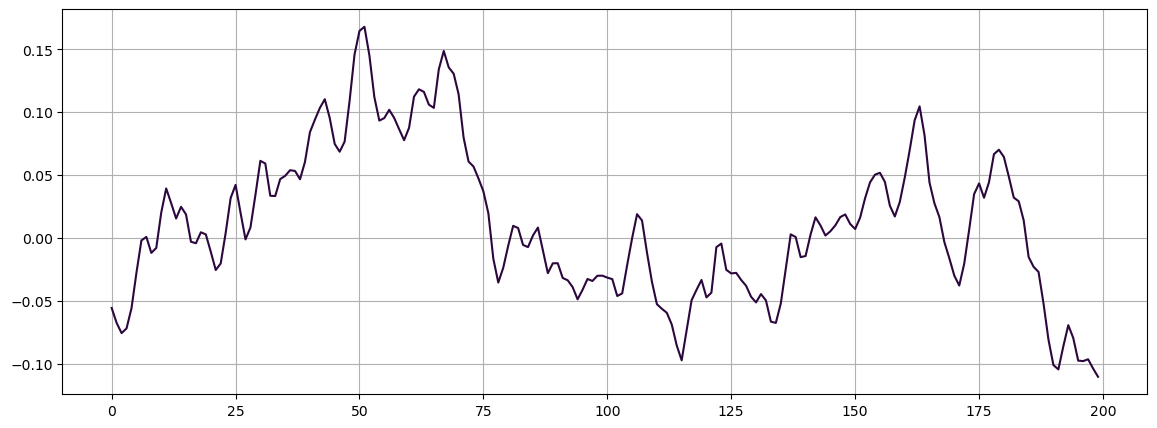

In [29]:
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color= "#2b073d")
plt.grid()

In [31]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print("The number of zero-crossings is: ", sum(zero_cross_rate))

The number of zero-crossings is:  22
